In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv('AmazonSales.csv')
df.head(5)

,Unnamed: 0,Acs,Refrigerators,Microwaves,WashingMachines,Smartphones,Laptops,Sales
0,1,230.1,37.8,69.2,69.2,69.2,69.2,22.1
1,2,44.5,39.3,45.1,45.1,45.1,45.1,10.4
2,3,17.2,45.9,69.3,69.3,69.3,69.3,9.3
3,4,151.5,41.3,58.5,58.5,58.5,58.5,18.5
4,5,180.8,10.8,58.4,58.4,58.4,58.4,12.9


In [5]:
df.isnull().sum()

Unnamed: 0         0
Acs                0
Refrigerators      0
Microwaves         0
WashingMachines    0
Smartphones        0
Laptops            0
Sales              0
dtype: int64

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
X = df[['Acs', 'Refrigerators', 'Microwaves', 'WashingMachines', 'Smartphones', 'Laptops']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:

results_df = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

print(results_df)


     Actual Sales  Predicted Sales
0           787.3       786.977079
1            96.3        96.770606
2           352.3       352.476622
3           640.3       640.145890
4           460.3       460.352598
..            ...              ...
204         505.3       505.300921
205         664.3       664.118329
206         433.3       433.383604
207         274.3       274.566195
208         820.3       819.939183

[209 rows x 2 columns]


In [17]:
vals = tuple(map(float, input("Enter 6 ad spends (ACs, Refrigerators, Microwaves, WashingMachines, Smartphones, Laptops): ").split(",")))

cols = ['Acs', 'Refrigerators', 'Microwaves', 'WashingMachines', 'Smartphones', 'Laptops']
pred = model.predict(pd.DataFrame([vals], columns=cols))

print(f"Predicted Sales: {pred[0]:.2f}")


Enter 6 ad spends (ACs, Refrigerators, Microwaves, WashingMachines, Smartphones, Laptops):  80,60,75,85,95,58


Predicted Sales: 46.63


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.936977132206457
Mean Squared Error: 22.5364389241773
Root Mean Squared Error: 4.747255936241198
R-squared: 0.9997065443618115


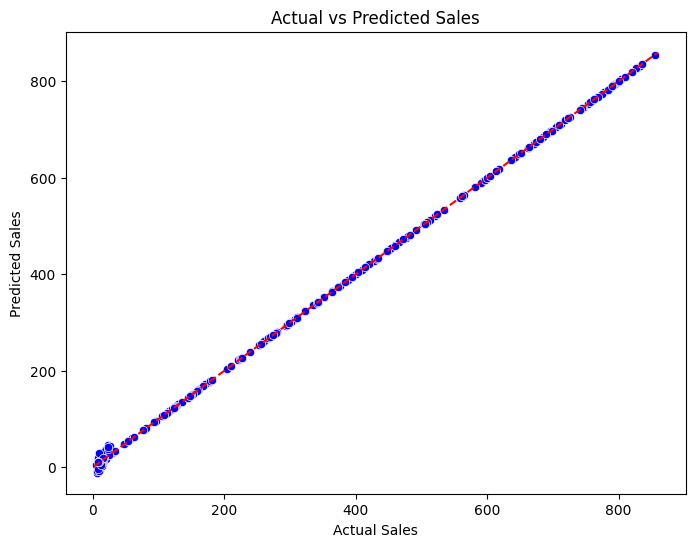

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

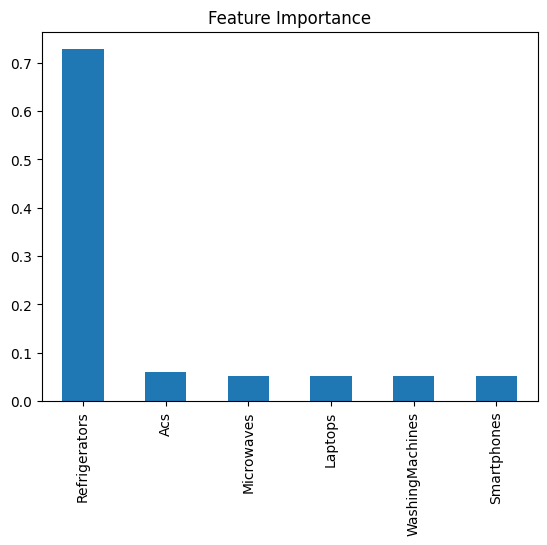

In [23]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False).plot(kind='bar', legend=False)
plt.title('Feature Importance')
plt.show()